In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy.stats import beta 
from tqdm import tqdm
import matplotlib.animation as anim

In [2]:
x = np.linspace(0,1,1000)
y = beta.pdf(x,2,4)

<IPython.core.display.Javascript object>


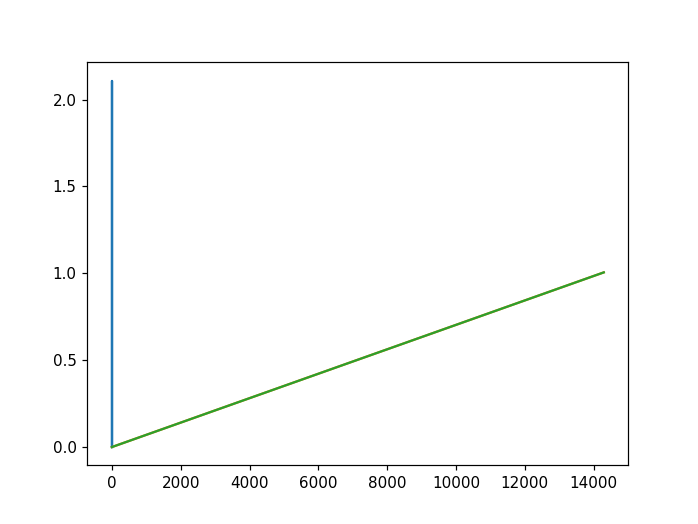

In [3]:
plt.plot(x,y)

In [4]:
def f(x):
    return beta.pdf(x,2,4)

In [5]:
I = integrate.quad(f,0,1)
I

(1.0000000000000002, 1.1102230246251569e-14)

In [6]:
max_ = np.max(y)
print(max_)

2.109373591560077


In [20]:
fraction=[]
points = np.array([[0,0]])
Integral_ = np.array([])

N = int(4e4)
trial = 0.
Integral = 0.

for i in tqdm(range(N)):
    
    xi = np.random.uniform(0,1)
    yi = np.random.uniform(0,max_)
    
    if yi < f(xi):
        trial += 1.
        fraction = trial/N
        Integral = fraction*max_
        
        points = np.vstack((points,[xi,yi]))
        Integral_ = np.append(Integral_,Integral)
        
print(fraction,Integral)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:05<00:00, 7527.43it/s]

0.4735 0.9987883956036965


In [21]:
N = points.shape[0]
print(N)

18941


In [22]:
Integral_

array([5.27343398e-05, 1.05468680e-04, 1.58203019e-04, ...,
       9.98682927e-01, 9.98735661e-01, 9.98788396e-01])

<IPython.core.display.Javascript object>


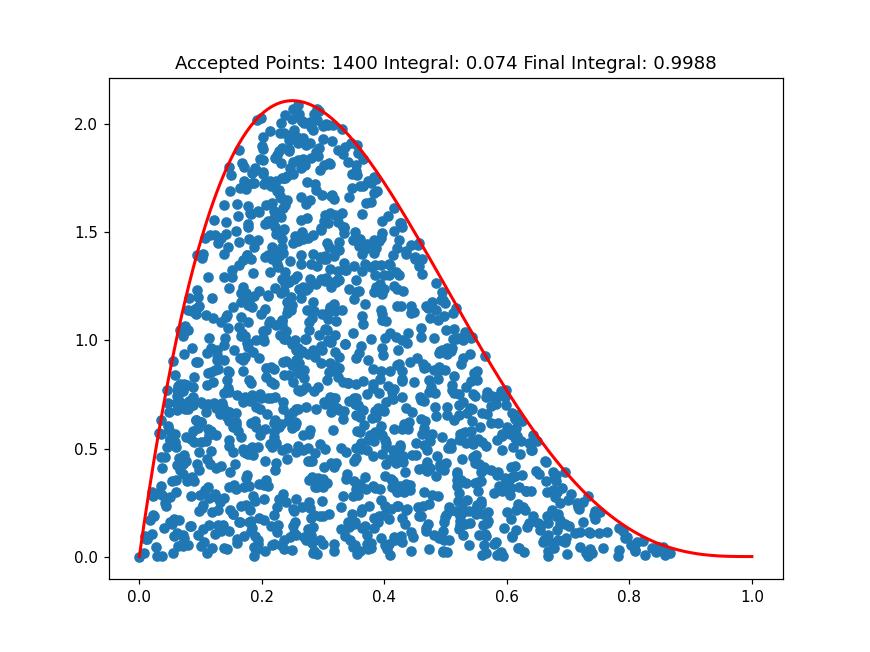

In [46]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)


def init():
    
    ax1.clear()
    
def Update(i):
    
    init()
    j = int(100*i)
    
    plot = ax1.set_title('Accepted Points: {:.0f} Integral: {:.3f} Final Integral: {:.4f}'.format(j,Integral_[j],Integral_[-1]))
    plot = ax1.plot(x,y,color='r',lw=2)
    plot = ax1.scatter(points[:,0][:j],points[:,1][:j])
    
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=int(N/500),init_func=init)  

In [48]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=2, metadata=dict(artist='Me'))
#Animation.save('Aceptacion.mp4', writer=writer_)